## Image recognition using CNN and Keras/Tensorflow
### Author: Gustavo H. Migliorini 

In [1]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import dataset
mnist_data = keras.datasets.mnist

In [3]:
# split the dataset into train and test
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

In [4]:
print('train: ', x_train.shape)
print('test: ', x_test.shape)

train:  (60000, 28, 28)
test:  (10000, 28, 28)


In [ ]:
print(x_train[5])

In [ ]:
print(y_train[:30])

In [5]:
#scale images to 0,1 range
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
print(x_train[5])

<function matplotlib.pyplot.show>

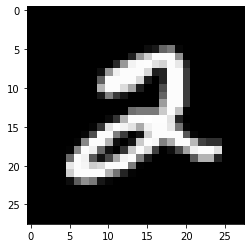

In [6]:
plt.imshow(x_train[5], cmap='gray')
plt.show

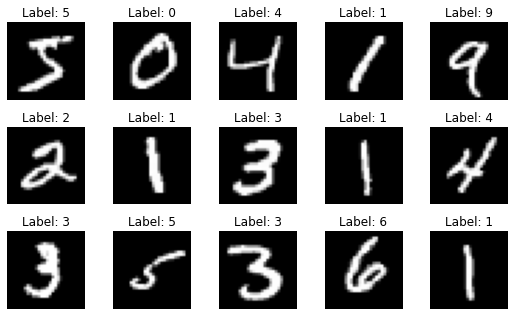

In [7]:
# plot data

n = 15
images = x_train[:n]
labels = y_train[:n]

n_row = 3
n_col = 5

fig, axes = plt.subplots(n_row, n_col, figsize = (1.5*n_col, 1.5*n_row))

for i in range(n):
  ax = axes[i//n_col, i%n_col]
  ax.imshow(images[i], cmap='gray')
  ax.set_title('Label: {}'.format(labels[i]))
  ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
#create the model with sequential layers
model = keras.Sequential([
                          keras.Input(shape=(28, 28, 1)),
                          layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
                          layers.MaxPooling2D(pool_size=(2,2)),
                          layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
                          layers.MaxPooling2D(pool_size=(2,2)),
                          layers.Flatten(),
                          layers.Dropout(0.5),
                          layers.Dense(64, activation="relu"),
                          layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [12]:
#configure the model for training
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# fit the model
history = model.fit(x_train, y_train, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0907 - accuracy: 0.9712 - val_loss: 0.0428 - val_accuracy: 0.9880
Epoch 2/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0644 - accuracy: 0.9795 - val_loss: 0.0382 - val_accuracy: 0.9883
Epoch 3/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0529 - accuracy: 0.9834 - val_loss: 0.0300 - val_accuracy: 0.9912
Epoch 4/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0431 - accuracy: 0.9867 - val_loss: 0.0317 - val_accuracy: 0.9917
Epoch 5/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0381 - accuracy: 0.9878 - val_loss: 0.0467 - val_accuracy: 0.9870
Epoch 6/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0354 - accuracy: 0.9884 - val_loss: 0.0350 - val_accuracy: 0.9897
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0322 - val_accuracy:

In [14]:
# evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

Test loss: 0.022979259490966797
Test accuracy 0.9923999905586243


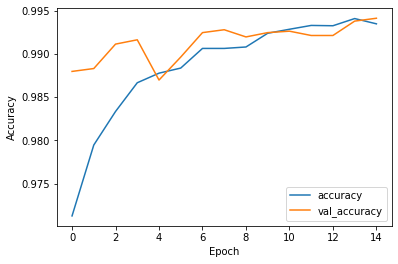

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

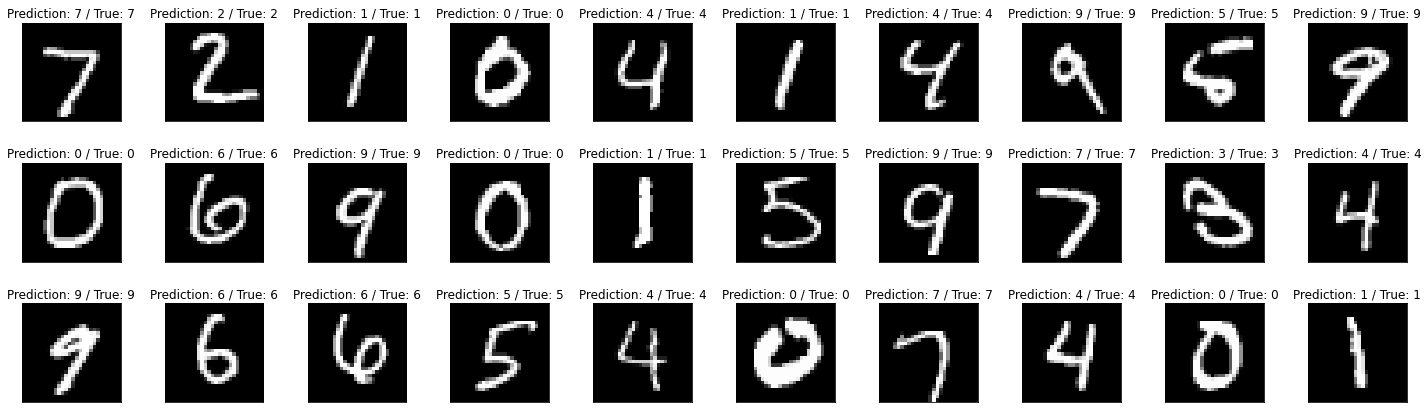

In [16]:
#Visualize some predictions
prediction = model.predict(x_test)

n = 30
images = x_test[:n]
labels = y_test[:n]

n_row = 3
n_col = 10

fig, axes = plt.subplots(n_row, n_col, figsize = (2*n_col, 2*n_row))

for i in range(n):
  ax = axes[i//n_col, i%n_col]
  ax.imshow(x_test[i], cmap='gray')
  ax.set_title("Prediction: "+ str(np.argmax(prediction[i]))+" / True: "+ str(y_test[i]))
  ax.set_xticks([])
  ax.set_yticks([])
plt.tight_layout()
plt.show()